In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

C:\Users\Main\AppData\Roaming\Python\Python310\site-packages\requests\__init__.py:102: RequestsDependencyWarning: urllib3 (1.26.8) or chardet (5.0.0)/charset_normalizer (2.0.10) doesn't match a supported version!
  warnings.warn("urllib3 ({}) or chardet ({})/charset_normalizer ({}) doesn't match a supported "


In [2]:
df = pd.read_csv("Test.csv")
df = df.sample(frac=1)
df

,DensityX,Composition,Time s,Temperature °C,Shear Rate 1/s,Shear Stress Pa,Instantaneous Viscosity Pas,Strain
1060,1.740,20,121.10,25.0,786.9,32.61,0.04144,69600.0
1121,1.740,20,43.01,25.0,427.7,31.52,0.07370,9663.0
857,1.740,10,115.10,25.0,846.8,186.10,0.21970,64800.0
641,4.506,30,83.03,25.0,825.6,323.50,0.39190,35200.0
1220,1.740,30,41.01,25.0,407.3,46.74,0.11470,8801.0
...,...,...,...,...,...,...,...,...
14,4.506,10,29.01,25.0,287.7,1113.00,3.87000,4487.0
1349,1.740,30,99.01,25.0,985.1,65.53,0.06652,50000.0
948,1.740,10,97.03,25.0,964.8,104.90,0.10880,48000.0
937,1.740,10,75.01,25.0,745.7,108.70,0.14570,28800.0


In [3]:
df["Temperature °C"].unique()

array([25. , 25.1])

In [4]:
df = df.drop(["Temperature °C"], axis=1)

In [5]:
df

,DensityX,Composition,Time s,Shear Rate 1/s,Shear Stress Pa,Instantaneous Viscosity Pas,Strain
1060,1.740,20,121.10,786.9,32.61,0.04144,69600.0
1121,1.740,20,43.01,427.7,31.52,0.07370,9663.0
857,1.740,10,115.10,846.8,186.10,0.21970,64800.0
641,4.506,30,83.03,825.6,323.50,0.39190,35200.0
1220,1.740,30,41.01,407.3,46.74,0.11470,8801.0
...,...,...,...,...,...,...,...
14,4.506,10,29.01,287.7,1113.00,3.87000,4487.0
1349,1.740,30,99.01,985.1,65.53,0.06652,50000.0
948,1.740,10,97.03,964.8,104.90,0.10880,48000.0
937,1.740,10,75.01,745.7,108.70,0.14570,28800.0


In [6]:
print("Number of rows = ", df.shape[0])
print("Number of columns = ", df.shape[1])

Number of rows =  1400
Number of columns =  7


In [7]:
df.describe()

,DensityX,Composition,Time s,Shear Rate 1/s,Shear Stress Pa,Instantaneous Viscosity Pas,Strain
count,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000
mean,3.123000,20.000000,100.056511,497.751099,217.173214,1.453829,50515.047186
std,1.383494,8.454563,57.790383,287.424599,302.521861,6.503806,36550.805682
min,1.740000,10.000000,1.004000,9.443000,2.085000,0.012820,19.010000
25%,1.740000,10.000000,50.515000,248.975000,41.217500,0.079978,13250.000000
50%,3.123000,20.000000,100.015000,497.750000,69.570000,0.189700,51000.000000
75%,4.506000,30.000000,149.600000,746.400000,241.800000,0.691700,87825.000000
max,4.506000,30.000000,199.100000,986.200000,1736.000000,146.200000,100000.000000


In [8]:
df.corr()

,DensityX,Composition,Time s,Shear Rate 1/s,Shear Stress Pa,Instantaneous Viscosity Pas,Strain
DensityX,1.000000e+00,0.169031,-4.945743e-08,-0.000051,0.348770,0.069420,0.000071
Composition,1.690309e-01,1.000000,7.461150e-06,0.000008,-0.174842,-0.067276,-0.000055
Time s,-4.945743e-08,0.000007,1.000000e+00,0.001877,-0.163972,-0.151098,0.988220
Shear Rate 1/s,-5.082900e-05,0.000008,1.876702e-03,1.000000,-0.065694,-0.271128,0.009576
Shear Stress Pa,3.487703e-01,-0.174842,-1.639716e-01,-0.065694,1.000000,0.375220,-0.151259
Instantaneous Viscosity Pas,6.942013e-02,-0.067276,-1.510977e-01,-0.271128,0.375220,1.000000,-0.127739
Strain,7.059157e-05,-0.000055,9.882201e-01,0.009576,-0.151259,-0.127739,1.000000


In [9]:
X = df[["Shear Rate 1/s", "Shear Stress Pa", "Strain  ", "Composition", "DensityX", "Time s"]]
Y = df[["Instantaneous Viscosity Pas"]]

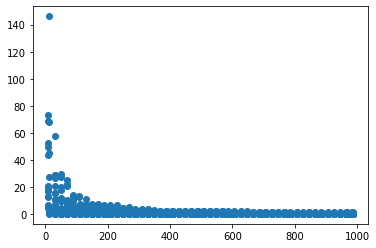

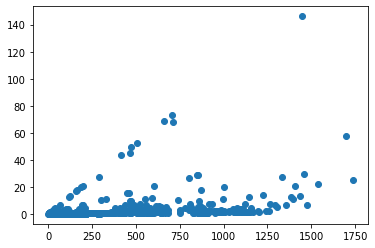

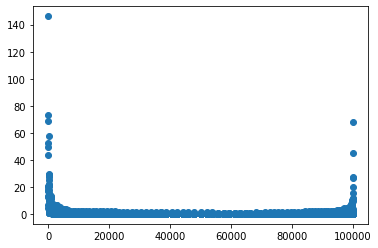

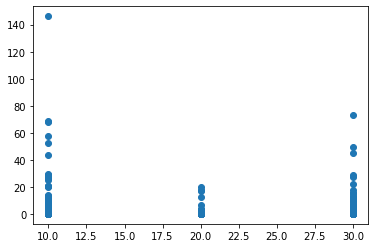

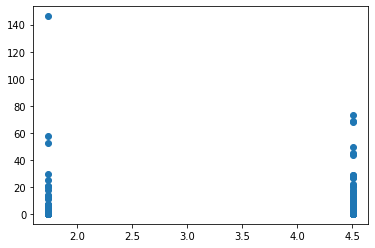

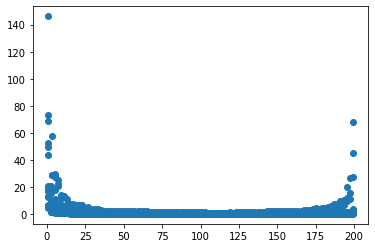

In [10]:
for i in X:
    plt.scatter(df[i], Y)
    plt.show()

In [11]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.1, random_state=42) 

In [12]:
#Data Normalization
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)
#y_train = scaler.fit_transform(y_train)
#y_test = scaler.transform(y_test)

In [13]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LeakyReLU, PReLU, ELU, ReLU
from tensorflow.keras.layers import Dropout

In [14]:
classifier = Sequential()
classifier.add(Dense(units=6, activation="relu"))
classifier.add(Dense(units=16, activation="relu"))
classifier.add(Dense(units=16, activation="relu"))
classifier.add(Dense(units=16, activation="relu"))
classifier.add(Dense(units=16, activation="relu"))
classifier.add(Dense(units=16, activation="relu"))
classifier.add(Dense(units=4, activation="relu"))
classifier.add(Dense(units=4, activation="relu"))
classifier.add(Dense(units=1, activation="linear"))

In [15]:
opt = tf.keras.optimizers.Adam(learning_rate = 0.004)
classifier.compile(optimizer="adam", loss=tf.keras.losses.MeanAbsoluteError())


In [16]:
model_history = classifier.fit(x_train, y_train, validation_split=0.05, epochs=800, batch_size=1024)

Epoch 1/800
2/2 [==============================] - 1s 142ms/step - loss: 1.4188 - val_loss: 1.5506
Epoch 2/800
2/2 [==============================] - 0s 34ms/step - loss: 1.4055 - val_loss: 1.5358
Epoch 3/800
2/2 [==============================] - 0s 29ms/step - loss: 1.3906 - val_loss: 1.5209
Epoch 4/800
2/2 [==============================] - 0s 30ms/step - loss: 1.3761 - val_loss: 1.5067
Epoch 5/800
2/2 [==============================] - 0s 27ms/step - loss: 1.3633 - val_loss: 1.4939
Epoch 6/800
2/2 [==============================] - 0s 29ms/step - loss: 1.3530 - val_loss: 1.4835
Epoch 7/800
2/2 [==============================] - 0s 27ms/step - loss: 1.3447 - val_loss: 1.4754
Epoch 8/800
2/2 [==============================] - 0s 30ms/step - loss: 1.3381 - val_loss: 1.4685
Epoch 9/800
2/2 [==============================] - 0s 30ms/step - loss: 1.3330 - val_loss: 1.4625
Epoch 10/800
2/2 [==============================] - 0s 24ms/step - loss: 1.3292 - val_loss: 1.4576
Epoch 11/800
2/2 [

Epoch 84/800
2/2 [==============================] - 0s 29ms/step - loss: 0.8405 - val_loss: 1.0262
Epoch 85/800
2/2 [==============================] - 0s 26ms/step - loss: 0.8348 - val_loss: 1.0096
Epoch 86/800
2/2 [==============================] - 0s 31ms/step - loss: 0.8308 - val_loss: 1.0077
Epoch 87/800
2/2 [==============================] - 0s 27ms/step - loss: 0.8253 - val_loss: 1.0155
Epoch 88/800
2/2 [==============================] - 0s 30ms/step - loss: 0.8226 - val_loss: 1.0030
Epoch 89/800
2/2 [==============================] - 0s 30ms/step - loss: 0.8133 - val_loss: 0.9928
Epoch 90/800
2/2 [==============================] - 0s 29ms/step - loss: 0.8082 - val_loss: 0.9953
Epoch 91/800
2/2 [==============================] - 0s 29ms/step - loss: 0.8044 - val_loss: 0.9900
Epoch 92/800
2/2 [==============================] - 0s 28ms/step - loss: 0.7984 - val_loss: 0.9712
Epoch 93/800
2/2 [==============================] - 0s 28ms/step - loss: 0.7921 - val_loss: 0.9589
Epoch 94/8

2/2 [==============================] - 0s 34ms/step - loss: 0.6178 - val_loss: 0.8231
Epoch 167/800
2/2 [==============================] - 0s 29ms/step - loss: 0.6163 - val_loss: 0.8134
Epoch 168/800
2/2 [==============================] - 0s 30ms/step - loss: 0.6133 - val_loss: 0.8092
Epoch 169/800
2/2 [==============================] - 0s 29ms/step - loss: 0.6115 - val_loss: 0.8023
Epoch 170/800
2/2 [==============================] - 0s 27ms/step - loss: 0.6113 - val_loss: 0.7990
Epoch 171/800
2/2 [==============================] - 0s 29ms/step - loss: 0.6084 - val_loss: 0.8042
Epoch 172/800
2/2 [==============================] - 0s 27ms/step - loss: 0.6056 - val_loss: 0.7978
Epoch 173/800
2/2 [==============================] - 0s 30ms/step - loss: 0.6031 - val_loss: 0.7901
Epoch 174/800
2/2 [==============================] - 0s 31ms/step - loss: 0.6011 - val_loss: 0.7841
Epoch 175/800
2/2 [==============================] - 0s 28ms/step - loss: 0.5983 - val_loss: 0.7784
Epoch 176/800


2/2 [==============================] - 0s 31ms/step - loss: 0.5026 - val_loss: 0.6559
Epoch 249/800
2/2 [==============================] - 0s 28ms/step - loss: 0.5027 - val_loss: 0.6572
Epoch 250/800
2/2 [==============================] - 0s 26ms/step - loss: 0.5039 - val_loss: 0.6565
Epoch 251/800
2/2 [==============================] - 0s 32ms/step - loss: 0.5064 - val_loss: 0.6670
Epoch 252/800
2/2 [==============================] - 0s 30ms/step - loss: 0.5036 - val_loss: 0.6800
Epoch 253/800
2/2 [==============================] - 0s 30ms/step - loss: 0.5130 - val_loss: 0.6721
Epoch 254/800
2/2 [==============================] - 0s 35ms/step - loss: 0.5131 - val_loss: 0.6550
Epoch 255/800
2/2 [==============================] - 0s 28ms/step - loss: 0.5041 - val_loss: 0.6589
Epoch 256/800
2/2 [==============================] - 0s 31ms/step - loss: 0.5018 - val_loss: 0.6423
Epoch 257/800
2/2 [==============================] - 0s 29ms/step - loss: 0.5014 - val_loss: 0.6459
Epoch 258/800


2/2 [==============================] - 0s 28ms/step - loss: 0.4541 - val_loss: 0.5912
Epoch 331/800
2/2 [==============================] - 0s 31ms/step - loss: 0.4550 - val_loss: 0.5872
Epoch 332/800
2/2 [==============================] - 0s 30ms/step - loss: 0.4516 - val_loss: 0.5969
Epoch 333/800
2/2 [==============================] - 0s 35ms/step - loss: 0.4573 - val_loss: 0.5990
Epoch 334/800
2/2 [==============================] - 0s 31ms/step - loss: 0.4569 - val_loss: 0.5982
Epoch 335/800
2/2 [==============================] - 0s 30ms/step - loss: 0.4573 - val_loss: 0.5915
Epoch 336/800
2/2 [==============================] - 0s 30ms/step - loss: 0.4652 - val_loss: 0.5778
Epoch 337/800
2/2 [==============================] - 0s 31ms/step - loss: 0.4567 - val_loss: 0.5809
Epoch 338/800
2/2 [==============================] - 0s 28ms/step - loss: 0.4549 - val_loss: 0.5781
Epoch 339/800
2/2 [==============================] - 0s 30ms/step - loss: 0.4503 - val_loss: 0.5868
Epoch 340/800


2/2 [==============================] - 0s 29ms/step - loss: 0.3783 - val_loss: 0.4326
Epoch 413/800
2/2 [==============================] - 0s 29ms/step - loss: 0.3787 - val_loss: 0.4415
Epoch 414/800
2/2 [==============================] - 0s 29ms/step - loss: 0.3727 - val_loss: 0.4557
Epoch 415/800
2/2 [==============================] - 0s 28ms/step - loss: 0.3683 - val_loss: 0.4827
Epoch 416/800
2/2 [==============================] - 0s 30ms/step - loss: 0.3706 - val_loss: 0.4836
Epoch 417/800
2/2 [==============================] - 0s 31ms/step - loss: 0.3674 - val_loss: 0.4631
Epoch 418/800
2/2 [==============================] - 0s 29ms/step - loss: 0.3657 - val_loss: 0.4595
Epoch 419/800
2/2 [==============================] - 0s 29ms/step - loss: 0.3679 - val_loss: 0.4661
Epoch 420/800
2/2 [==============================] - 0s 30ms/step - loss: 0.3654 - val_loss: 0.4841
Epoch 421/800
2/2 [==============================] - 0s 29ms/step - loss: 0.3657 - val_loss: 0.4619
Epoch 422/800


2/2 [==============================] - 0s 28ms/step - loss: 0.2727 - val_loss: 0.3093
Epoch 495/800
2/2 [==============================] - 0s 31ms/step - loss: 0.2808 - val_loss: 0.2809
Epoch 496/800
2/2 [==============================] - 0s 30ms/step - loss: 0.2720 - val_loss: 0.2415
Epoch 497/800
2/2 [==============================] - 0s 29ms/step - loss: 0.2745 - val_loss: 0.2287
Epoch 498/800
2/2 [==============================] - 0s 27ms/step - loss: 0.2733 - val_loss: 0.2446
Epoch 499/800
2/2 [==============================] - 0s 31ms/step - loss: 0.2748 - val_loss: 0.2981
Epoch 500/800
2/2 [==============================] - 0s 29ms/step - loss: 0.2854 - val_loss: 0.3123
Epoch 501/800
2/2 [==============================] - 0s 30ms/step - loss: 0.2806 - val_loss: 0.2981
Epoch 502/800
2/2 [==============================] - 0s 30ms/step - loss: 0.2744 - val_loss: 0.2769
Epoch 503/800
2/2 [==============================] - 0s 33ms/step - loss: 0.2698 - val_loss: 0.2779
Epoch 504/800


2/2 [==============================] - 0s 30ms/step - loss: 0.2217 - val_loss: 0.1622
Epoch 577/800
2/2 [==============================] - 0s 31ms/step - loss: 0.2202 - val_loss: 0.1849
Epoch 578/800
2/2 [==============================] - 0s 30ms/step - loss: 0.2228 - val_loss: 0.1991
Epoch 579/800
2/2 [==============================] - 0s 30ms/step - loss: 0.2188 - val_loss: 0.1968
Epoch 580/800
2/2 [==============================] - 0s 32ms/step - loss: 0.2129 - val_loss: 0.1707
Epoch 581/800
2/2 [==============================] - 0s 31ms/step - loss: 0.2131 - val_loss: 0.1417
Epoch 582/800
2/2 [==============================] - 0s 27ms/step - loss: 0.2132 - val_loss: 0.1731
Epoch 583/800
2/2 [==============================] - 0s 32ms/step - loss: 0.2089 - val_loss: 0.1927
Epoch 584/800
2/2 [==============================] - 0s 31ms/step - loss: 0.2110 - val_loss: 0.1441
Epoch 585/800
2/2 [==============================] - 0s 30ms/step - loss: 0.2189 - val_loss: 0.1458
Epoch 586/800


2/2 [==============================] - 0s 38ms/step - loss: 0.1936 - val_loss: 0.0826
Epoch 659/800
2/2 [==============================] - 0s 49ms/step - loss: 0.1708 - val_loss: 0.0913
Epoch 660/800
2/2 [==============================] - 0s 48ms/step - loss: 0.1735 - val_loss: 0.1151
Epoch 661/800
2/2 [==============================] - 0s 44ms/step - loss: 0.1707 - val_loss: 0.1011
Epoch 662/800
2/2 [==============================] - 0s 36ms/step - loss: 0.1726 - val_loss: 0.0551
Epoch 663/800
2/2 [==============================] - 0s 34ms/step - loss: 0.1709 - val_loss: 0.0877
Epoch 664/800
2/2 [==============================] - 0s 32ms/step - loss: 0.1783 - val_loss: 0.0741
Epoch 665/800
2/2 [==============================] - 0s 37ms/step - loss: 0.1662 - val_loss: 0.0744
Epoch 666/800
2/2 [==============================] - 0s 35ms/step - loss: 0.1823 - val_loss: 0.0771
Epoch 667/800
2/2 [==============================] - 0s 32ms/step - loss: 0.1704 - val_loss: 0.1409
Epoch 668/800


2/2 [==============================] - 0s 35ms/step - loss: 0.1387 - val_loss: 0.2913
Epoch 741/800
2/2 [==============================] - 0s 33ms/step - loss: 0.1565 - val_loss: 0.2294
Epoch 742/800
2/2 [==============================] - 0s 31ms/step - loss: 0.1350 - val_loss: 0.1530
Epoch 743/800
2/2 [==============================] - 0s 32ms/step - loss: 0.1484 - val_loss: 0.2205
Epoch 744/800
2/2 [==============================] - 0s 34ms/step - loss: 0.1457 - val_loss: 0.2354
Epoch 745/800
2/2 [==============================] - 0s 30ms/step - loss: 0.1438 - val_loss: 0.1343
Epoch 746/800
2/2 [==============================] - 0s 33ms/step - loss: 0.1661 - val_loss: 0.1565
Epoch 747/800
2/2 [==============================] - 0s 29ms/step - loss: 0.1487 - val_loss: 0.2889
Epoch 748/800
2/2 [==============================] - 0s 31ms/step - loss: 0.1734 - val_loss: 0.2525
Epoch 749/800
2/2 [==============================] - 0s 33ms/step - loss: 0.1498 - val_loss: 0.1839
Epoch 750/800


In [17]:
model_history.history.keys()

dict_keys(['loss', 'val_loss'])

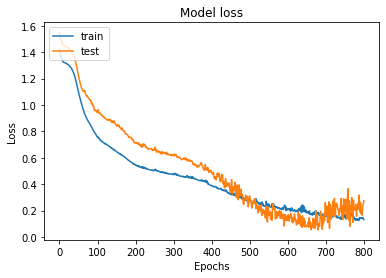

In [18]:
plt.plot(model_history.history["loss"])
plt.plot(model_history.history["val_loss"])
plt.title("Model loss")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend(["train", "test"], loc = "upper left")
plt.show()

In [19]:
y_pred = classifier.predict(x_test)

In [20]:
error = 100*(np.sum(abs((y_test - y_pred)/y_test)))/140
error

Instantaneous Viscosity Pas    12.789367
dtype: float64

In [21]:
y_train_pred = classifier.predict(x_train)

In [22]:
error1 = 100*(np.sum(abs((y_train - y_train_pred)/y_train)))/1260
error1

Instantaneous Viscosity Pas    13.048261
dtype: float64

In [23]:
for layer in classifier.layers:
    weights = layer.get_weights() # list of numpy arrays

In [24]:
weights

[array([[-0.38943332],
        [ 1.0680902 ],
        [ 0.6869988 ],
        [ 0.47236142]], dtype=float32),
 array([-0.0051367], dtype=float32)]

In [25]:
y_train.count()

Instantaneous Viscosity Pas    1260
dtype: int64

In [26]:
scaler.transform([[607.4, 59.06, 82000, 10, 2.7, 139.10]])

C:\Users\Main\AppData\Roaming\Python\Python310\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


array([[0.61218604, 0.03285917, 0.81996578, 0.        , 0.34707158,
        0.69711655]])

In [27]:
classifier.predict([[0.61218604, 0.03285917, 0.81996578, 0, 0.34707158, 0.69711655]])

array([[0.07111315]], dtype=float32)

In [28]:
classifier.predict([[0.52966808, 0.03811317, 0.14583762, 0, 0.34707158, 0.26263024]])

array([[0.07262183]], dtype=float32)